In [17]:
!pip install folium


   -------------------- ------------------- 1/2 [folium]
   ---------------------------------------- 2/2 [folium]



In [2]:
import folium


map = folium.Map(location=[40.4093, 49.8671], zoom_start=7)


folium.Marker(
    location=[40.4093, 49.8671],
    popup="Baku",
    tooltip="Click for info"
).add_to(map)


map.save("baku_map.html")

1. Plot all telecom sites on a Folium map using their latitude and longitude.

In [56]:
import pandas as pd
import folium

df = pd.read_excel("telecom_visualization_tasks.xlsx", sheet_name="Site_Data")
telecom_map = folium.Map(location=[40.4093, 49.8671], zoom_start=7)

for _, row in df.iterrows():
    folium.Marker(
        location=[row["Latitude"], row["Longitude"]],
        popup=f"{row['Site_Name']} ({row['Region']})"
    ).add_to(telecom_map)

telecom_map.save("task1_all_sites.html")
from IPython.display import IFrame


telecom_map.save("taskX_map.html")

IFrame("taskX_map.html", width=800, height=500)

2. Color-code markers based on the Region field (e.g., Baku = blue, Ganja = green).

In [54]:
region_colors = {
    "Baku": "blue",
    "Ganja": "green",
    "Sumqayit": "purple",
    "Mingachevir": "orange",
    "Nakhchivan": "darkred",
    "Lankaran": "cadetblue"
}

telecom_map = folium.Map(location=[40.4093, 49.8671], zoom_start=7)

for _, row in df.iterrows():
    folium.CircleMarker(
        location=[row["Latitude"], row["Longitude"]],
        radius=6,
        color=region_colors.get(row["Region"], "gray"),
        fill=True,
        fill_opacity=0.7,
        popup=row["Site_Name"]
    ).add_to(telecom_map)

telecom_map.save("task2_region_colors.html")
from IPython.display import IFrame


telecom_map.save("taskX_map.html")


IFrame("taskX_map.html", width=800, height=500)

3. Implement marker clustering to avoid overlap of sites in dense areas.

In [53]:
from folium.plugins import MarkerCluster

telecom_map = folium.Map(location=[40.4093, 49.8671], zoom_start=7)
marker_cluster = MarkerCluster().add_to(telecom_map)

for _, row in df.iterrows():
    folium.Marker(
        location=[row["Latitude"], row["Longitude"]],
        popup=row["Site_Name"]
    ).add_to(marker_cluster)

telecom_map.save("task3_marker_cluster.html")
from IPython.display import IFrame

telecom_map.save("taskX_map.html")

IFrame("taskX_map.html", width=800, height=500)

4. Use different icons for sites with Status = OK, NOK, or Maintenance.

In [52]:
def get_status_icon(status):
    if status == "OK":
        return folium.Icon(color="green", icon="check", prefix="fa")
    elif status == "NOK":
        return folium.Icon(color="red", icon="times", prefix="fa")
    elif status == "Maintenance":
        return folium.Icon(color="orange", icon="wrench", prefix="fa")
    return folium.Icon(color="gray")

telecom_map = folium.Map(location=[40.4093, 49.8671], zoom_start=7)

for _, row in df.iterrows():
    folium.Marker(
        location=[row["Latitude"], row["Longitude"]],
        popup=row["Site_Name"],
        icon=get_status_icon(row["Status"])
    ).add_to(telecom_map)

telecom_map.save("task4_status_icons.html")
from IPython.display import IFrame

telecom_map.save("taskX_map.html")

IFrame("taskX_map.html", width=800, height=500)

5. Show detailed info in popup (Site Name, Status, Power Source, Energy Consumption).

In [57]:
telecom_map = folium.Map(location=[40.4093, 49.8671], zoom_start=7)

for _, row in df.iterrows():
    popup_info = f"""
    <b>{row['Site_Name']}</b><br>
    Status: {row['Status']}<br>
    Power: {row['Power_Source']}<br>
    Energy: {row['Energy_Consumption']}
    """
    folium.Marker(location=[row["Latitude"], row["Longitude"]],
                  popup=popup_info).add_to(telecom_map)

telecom_map.save("task5_popup_details.html")

from IPython.display import IFrame

telecom_map.save("taskX_map.html")

IFrame("taskX_map.html", width=800, height=500)

6. Create a choropleth map showing number of sites per Region using GeoJSON.

In [65]:
import geopandas as gpd



region_counts = df["Region"].value_counts().reset_index()
region_counts.columns = ["Region", "Count"]

telecom_map = folium.Map(location=[40.4093, 49.8671], zoom_start=7)

folium.Choropleth(
    geo_data=geojson_path,
    data=region_counts,
    columns=["Region", "Count"],
    key_on="feature.properties.Region", 
    fill_color="YlOrRd",
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name="Number of Sites"
).add_to(telecom_map)

telecom_map.save("task6_choropleth.html")
from IPython.display import IFrame

telecom_map.save("taskX_map.html")

IFrame("taskX_map.html", width=800, height=500)

FileNotFoundError: [Errno 2] No such file or directory: 'regions.geojson'

7. For each region, show a pie chart of Power_Source distribution on the map.

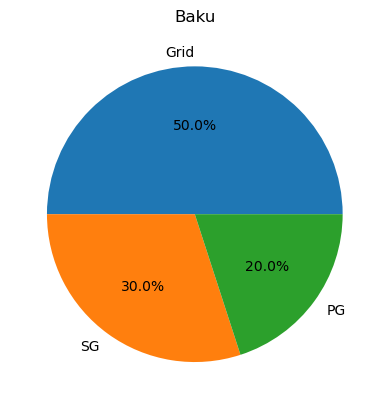

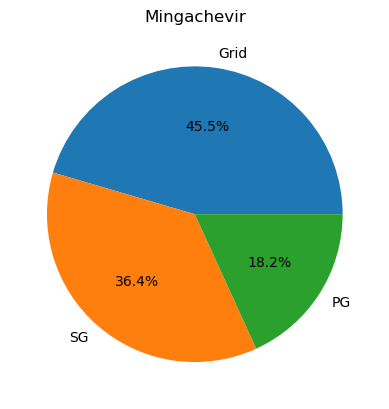

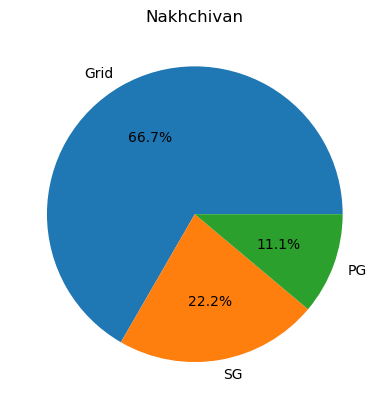

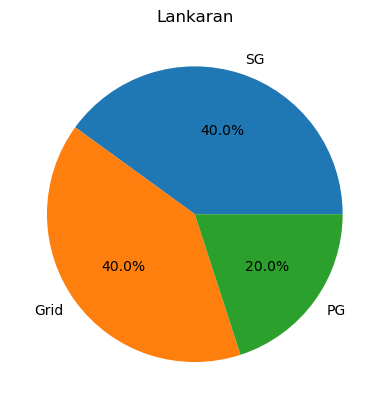

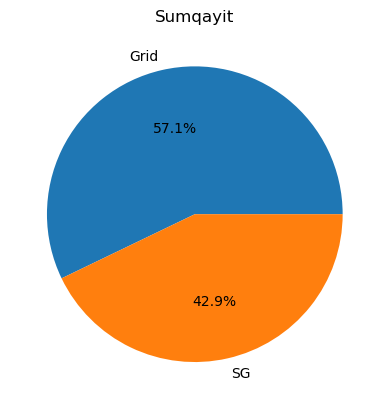

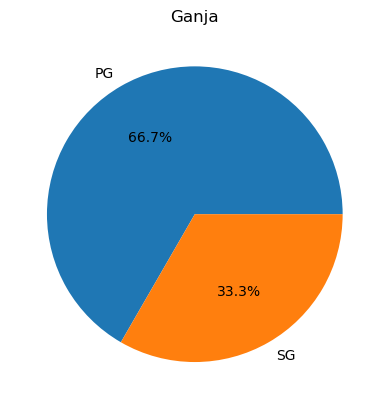

In [19]:
import matplotlib.pyplot as plt
import base64
from io import BytesIO

telecom_map = folium.Map(location=[40.4093, 49.8671], zoom_start=7)

for region in df["Region"].unique():
    region_df = df[df["Region"] == region]
    power_counts = region_df["Power_Source"].value_counts()

    fig, ax = plt.subplots()
    ax.pie(power_counts, labels=power_counts.index, autopct='%1.1f%%')
    ax.set_title(region)

    buffer = BytesIO()
    fig.savefig(buffer, format='png')
    buffer.seek(0)
    img_base64 = base64.b64encode(buffer.read()).decode()

    html = f'<img src="data:image/png;base64,{img_base64}">'
    iframe = folium.IFrame(html, width=350, height=250)
    popup = folium.Popup(iframe)

    
    avg_lat = region_df["Latitude"].mean()
    avg_lon = region_df["Longitude"].mean()

    folium.Marker(location=[avg_lat, avg_lon], popup=popup).add_to(telecom_map)

telecom_map.save("task7_piecharts.html")

8. Highlight in red the sites where Last_Alarm_Time was within the last 24 hours.

In [48]:
import pandas as pd
import folium
from datetime import datetime, timedelta



threshold = datetime.now() - timedelta(days=1)


telecom_map = folium.Map(location=[40.4093, 49.8671], zoom_start=7)


for _, row in df.iterrows():
    color = "red" if row["Last_Alarm_Time"] >= threshold else "blue"
    folium.CircleMarker(
        location=[row["Latitude"], row["Longitude"]],
        radius=6,
        color=color,
        fill=True,
        fill_opacity=0.7,
        popup=row["Site_Name"]
    ).add_to(telecom_map)

telecom_map.save("task8_recent_alarms.html")
from IPython.display import IFrame

# Xəritəni saxla
telecom_map.save("taskX_map.html")

# Notebook-da göstər
IFrame("taskX_map.html", width=800, height=500)

9. Add a layer control to filter map by site Priority.

In [63]:
telecom_map = folium.Map(location=[40.4093, 49.8671], zoom_start=7)
priorities = df["Priority"].unique()

for p in priorities:
    fg = folium.FeatureGroup(name=f"Priority {p}")
    subset = df[df["Priority"] == p]
    for _, row in subset.iterrows():
        folium.Marker(location=[row["Latitude"], row["Longitude"]],
                      popup=row["Site_Name"]).add_to(fg)
    fg.add_to(telecom_map)

folium.LayerControl().add_to(telecom_map)
telecom_map.save("task9_priority_filter.html")
from IPython.display import IFrame

# Xəritəni saxla
telecom_map.save("taskX_map.html")

# Notebook-da göstər
IFrame("taskX_map.html", width=800, height=500)

10. Build a mini dashboard to filter sites by Region, Status, or Power Source and update map.

In [51]:
import streamlit as st
import pandas as pd
import folium
from streamlit_folium import folium_static

df = pd.read_excel("telecom_visualization_tasks.xlsx", sheet_name="Site_Data")


region = st.selectbox("Select Region", ["All"] + sorted(df["Region"].unique()))
status = st.selectbox("Select Status", ["All"] + sorted(df["Status"].unique()))
power = st.selectbox("Select Power Source", ["All"] + sorted(df["Power_Source"].unique()))


filtered = df.copy()
if region != "All":
    filtered = filtered[filtered["Region"] == region]
if status != "All":
    filtered = filtered[filtered["Status"] == status]
if power != "All":
    filtered = filtered[filtered["Power_Source"] == power]


telecom_map = folium.Map(location=[40.4093, 49.8671], zoom_start=7)
for _, row in filtered.iterrows():
    popup_info = f"""
    <b>{row['Site_Name']}</b><br>
    Status: {row['Status']}<br>
    Power: {row['Power_Source']}<br>
    Energy: {row['Energy_Consumption']}
    """
    folium.Marker(location=[row["Latitude"], row["Longitude"]],
                  popup=popup_info).add_to(telecom_map)

folium_static(telecom_map)


2025-07-22 12:59:08.418 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-22 12:59:08.419 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-22 12:59:08.419 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-22 12:59:08.420 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-22 12:59:08.421 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-22 12:59:08.421 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-22 12:59:08.422 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-22 12:59:08.423 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bar

DeltaGenerator()

In [14]:
pip install geopandas

In [17]:
import os
print(os.getcwd())  

C:\Users\Cavidan\Downloads


In [33]:
!pip install streamlit-folium